*Prepared for the course "TDPS22: Data Science Programming" at Jönköping University, Teacher: [Marcel Bollmann](mailto:marcel.bollmann@ju.se)*

# Exercise 9: Data Visualization with ggplot2, continued

This notebook contains more exercises on data visualization, focusing on tweaking and customizing plots, as well as more advanced scenarios that require the combination of data manipulation and plotting.

### Learning Goals

- Understand _how to tweak and customize the appearance_ of plots created with ggplot2.
- Understand _how to combine data manipulation and plotting_ to create a desired visualization.

### Useful Resources

+ [§28 "Graphics for communication" in _R for Data Science_](https://r4ds.had.co.nz/graphics-for-communication.html)
+ [RStudio Cheatsheets](https://www.rstudio.com/resources/cheatsheets/)

- - -


In [1]:
library(tidyverse)
library(lubridate)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




- - -

### Datasets

We're re-using the coffee chain dataset (just the first one) and the Yu-Gi-Oh! dataset.

In [2]:
coffee <- read_csv("data/coffee-chain.csv", col_types="cfffiii") %>% mutate(Ddate = mdy(Ddate))
yugioh <- read_csv("data/yu-gi-oh.csv", col_types="cffiii")

- - - 

## Customizing plots

Remember that in Exercise 3, we created a point plot from the Yu-Gi-Oh! dataset that showed the _attack_ and _defense_ points of the cards, with the _level_ shown in color:

<div style="padding:1em">
<img src="03_yugioh_scatterplot.png" width="500"/>
</div>

Let's use this as an example of how to customize various aspects of a plot in ggplot2.  We'll start from this basic point plot, and add on more and more customizations, generally following [Chapter 28](https://r4ds.had.co.nz/graphics-for-communication.html) of the book:

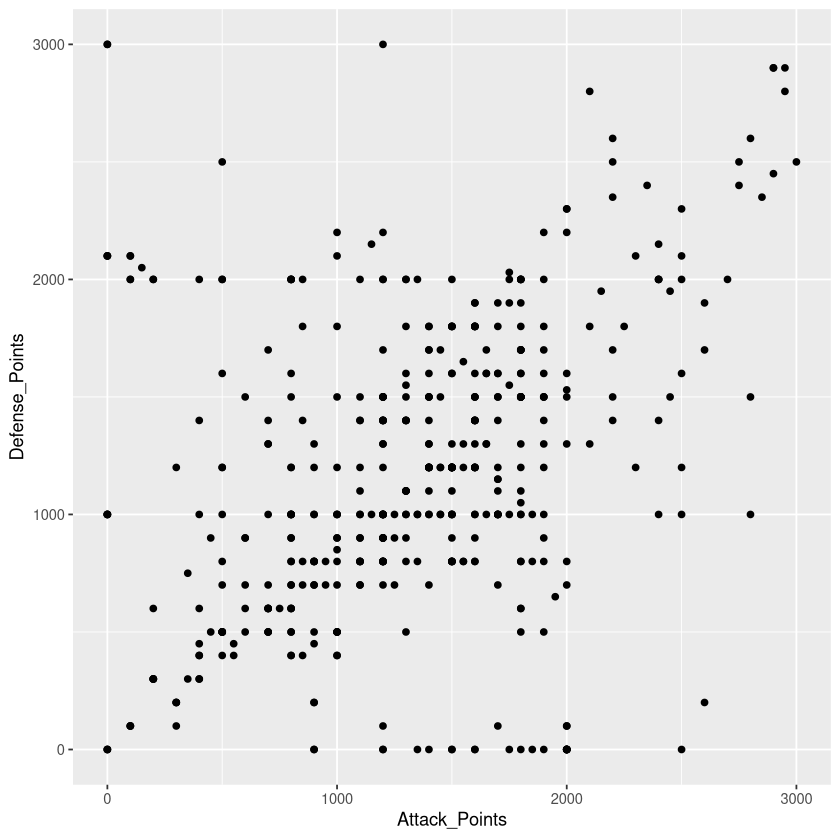

In [3]:
ggplot(yugioh, aes(x = Attack_Points, y = Defense_Points)) +
  geom_point()

_Note:_ If you don't want to keep copy-pasting your previous code for every new task below, you could (i) wrap the basic plot generation in a function; or (ii) use the `last_plot()` command to keep adding to the last plot you generated!

**1. Show the "Level" variable in color and make the points slightly larger!** The plot above is still missing the color-coded _level_, and also, the points are relatively thin. How can you modify the `geom_point` call to fix this?

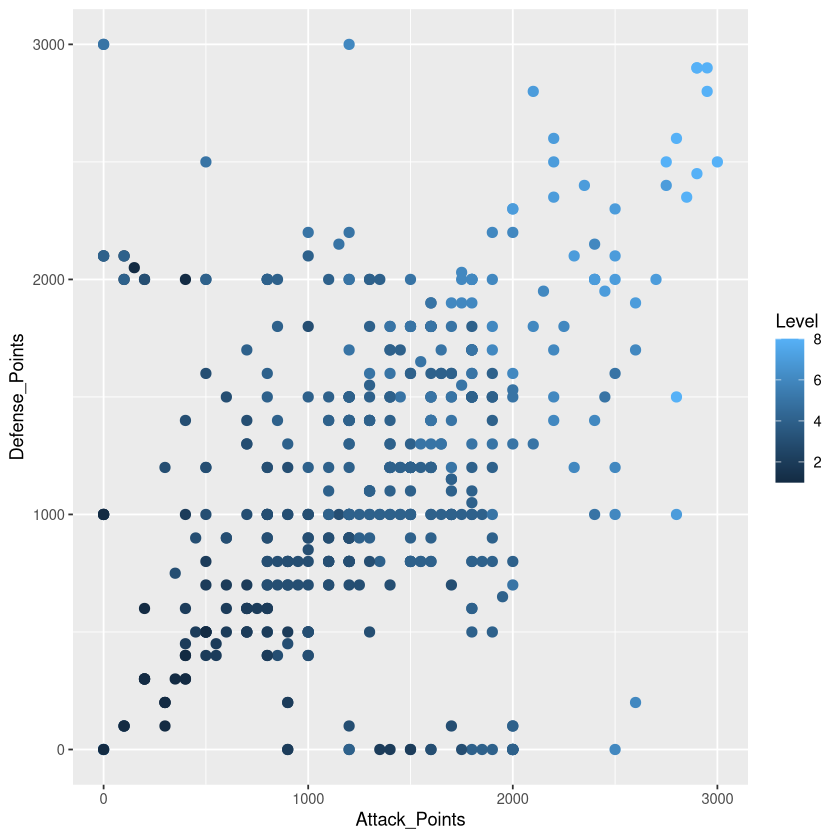

In [4]:
ggplot(yugioh, aes(x = Attack_Points, y = Defense_Points)) +
  geom_point(aes(color = Level), size = 2.5)

**2. Add labels to the plot & the axes!** Add a title, subtitle, caption, and customize the labels for the $x$- and $y$-axes as well as the color scale. It doesn't matter so much what exactly you put in it, but try to come up with meaningful descriptions for each.

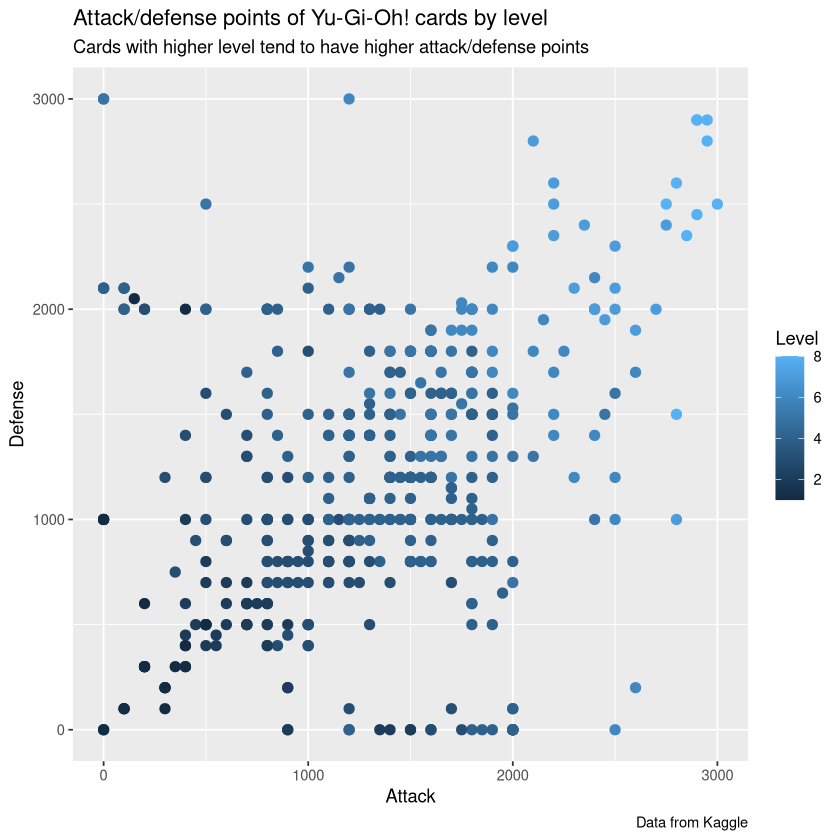

In [5]:
last_plot() +
  labs(
      title = "Attack/defense points of Yu-Gi-Oh! cards by level",
      subtitle = "Cards with higher level tend to have higher attack/defense points",
      caption = "Data from Kaggle",
      x = "Attack",
      y = "Defense",
      colour = "Level",
  )

**3. Modify both $x$- and $y$-axis to go between $[0, 3000]$ and have _major ticks_ (with labels) every 500 points, and _minor ticks_ (without labels) every 100 points!** Unfortunately, the book only describes how to customize major ticks. This might be because ggplot2 uses the term "breaks" instead of "ticks", and "minor breaks" show up as background lines rather than actual ticks in the default ggplot2 themes. Still, if you look up the help for the function you need to call, you should find the equivalent parameters for "minor breaks" as well.

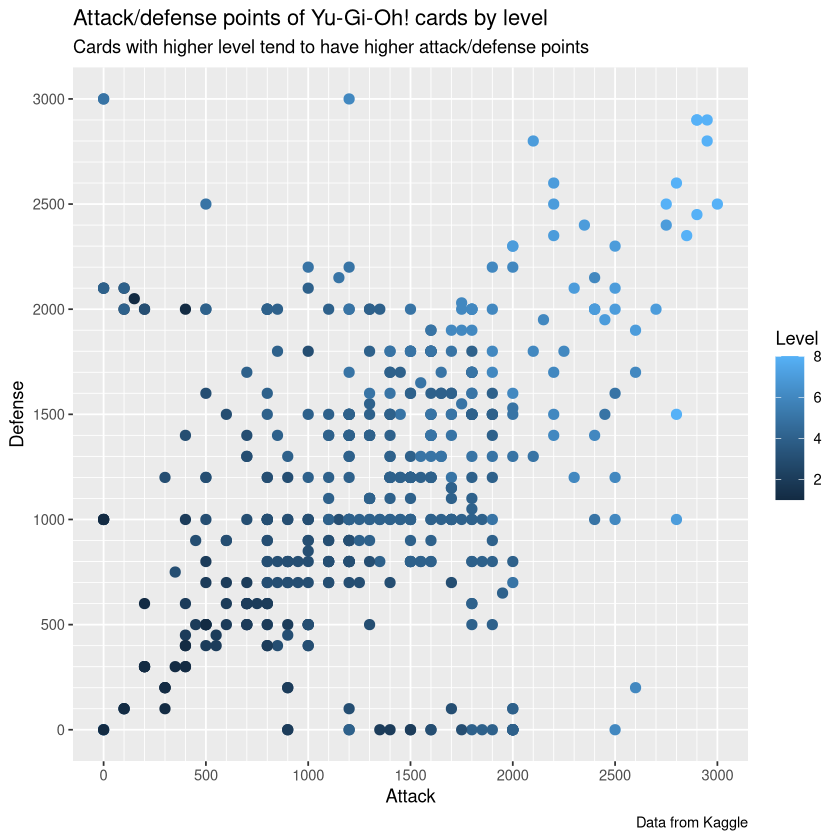

In [6]:
last_plot() +
  scale_y_continuous(
      breaks = seq(0, 3000, by = 500),
      minor_breaks = seq(0, 3000, by = 100)) +
  scale_x_continuous(
      breaks = seq(0, 3000, by = 500),
      minor_breaks = seq(0, 3000, by = 100))

**4. Modify the color scale to use something _other than blue_, and to have _darker_ shades the _higher_ the level is!** You should see that the default scale picked by ggplot2 has dark blue for the bottom end of the scale (i.e., level 1) and lighter blue for the top end of the scale (i.e., level 8). Try to modify this by (i) picking some other color palette than the default and (ii) making sure that the _darker_ end of the scale corresponds to _higher_ levels.

(_Note:_ There are many different color scale functions in ggplot2. You could look at `scale_color_brewer()`, `scale_color_distiller()`, `scale_fill_gradient()`, or `scale_color_gradient()`. **Only two of these work** for the plot we're currently creating. If you understand which ones work in this case & why the others don't, you'll have a good grasp of color scales in ggplot2!)

In [7]:
my_yugi_plot <- function(df = yugioh) {
    ggplot(df, aes(x = Attack_Points, y = Defense_Points)) +
      geom_point(aes(color = Level), size = 2.5) +
      labs(
          title = "Attack/defense points of Yu-Gi-Oh! cards by level",
          subtitle = "Cards with higher level tend to have higher attack/defense points",
          caption = "Data from Kaggle",
          x = "Attack",
          y = "Defense",
          colour = "Level",
      ) +
      scale_y_continuous(
          breaks = seq(0, 3000, by = 500),
          minor_breaks = seq(0, 3000, by = 100)) +
      scale_x_continuous(
          breaks = seq(0, 3000, by = 500),
          minor_breaks = seq(0, 3000, by = 100))
}

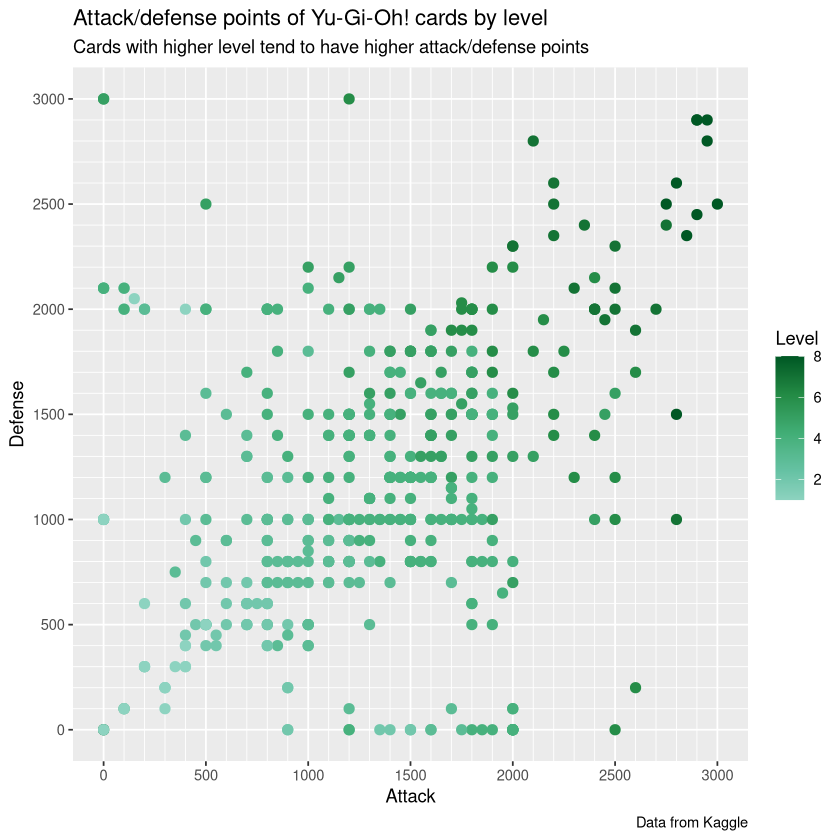

In [8]:
# scale_color_brewer() is for *discrete* scales, but our "Level" variable 
# is *continuous* because it is integer-valued.

# scale_color_distiller() is the continuous equivalent of scale_color_brewer():
my_yugi_plot() +
  scale_color_distiller(
      palette = "BuGn",
      direction = 1,
      values=c(-.6, 1)
  )


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




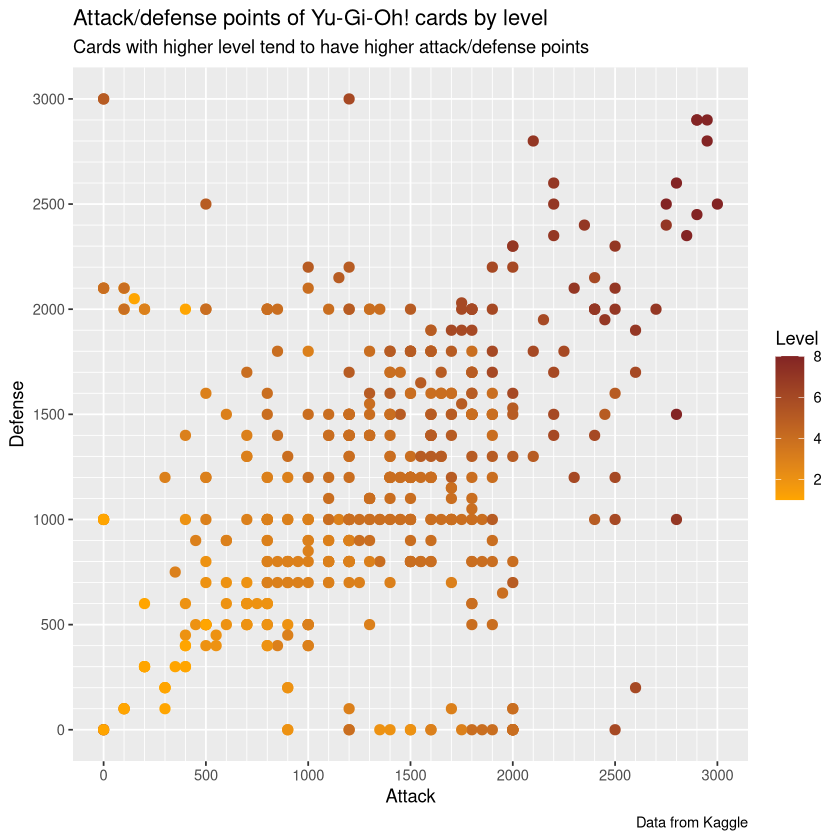

In [9]:
library(scales)  # to use muted(<colorname>)

# scale_color_gradient() is also for continuous variables. Here, we can
# supply color names for the low/high ends of the scale:
my_yugi_plot() +
  scale_color_gradient(
      low = "orange",
      high = muted("red")
  )

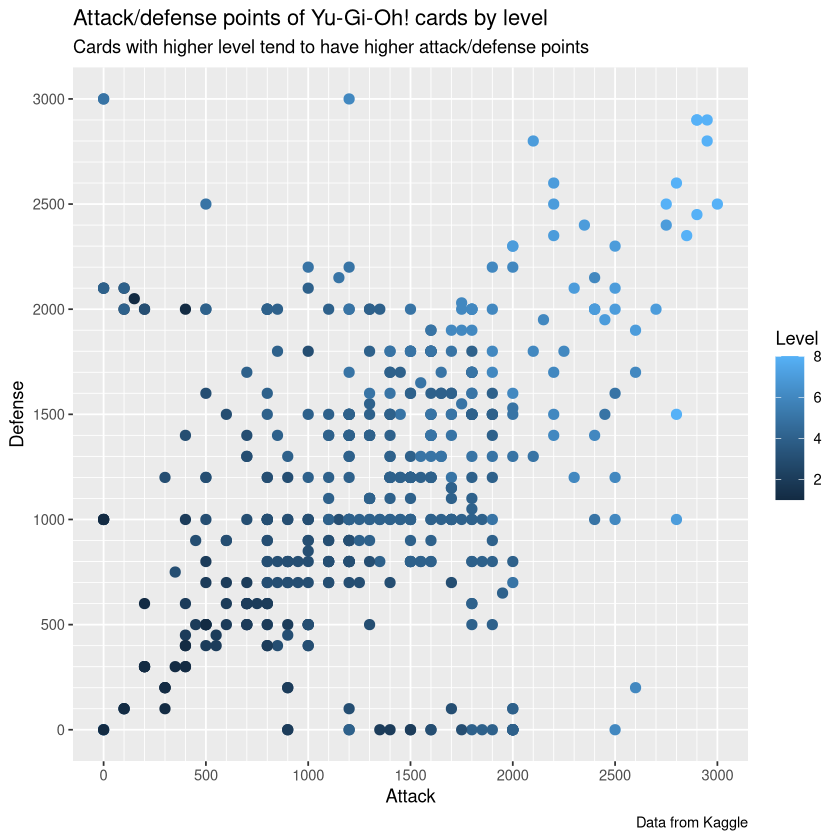

In [10]:
# scale_fill_gradient() is the same, but won't actually do anything here:
my_yugi_plot() +
  scale_fill_gradient(
      low = "orange",
      high = muted("red")
  )

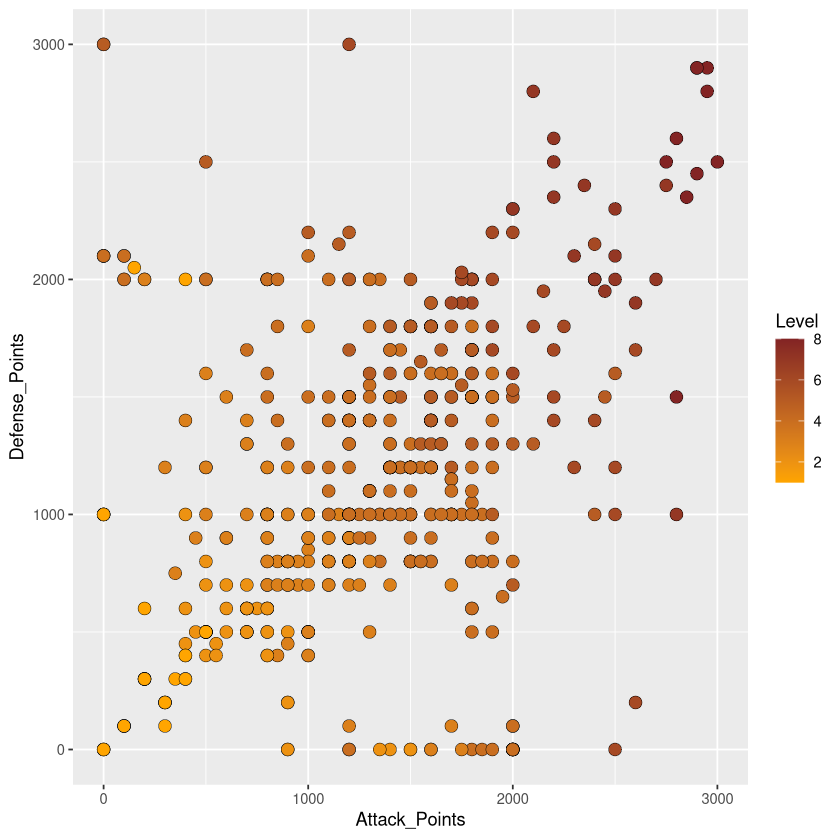

In [11]:
# This is because "color" and "fill" are two different aesthetics in ggplot2!
# If we use the "fill" aesthetics for the "Level" variable, it works:

ggplot(yugioh, aes(x = Attack_Points, y = Defense_Points)) +
  # shape = 21 means "filled circle"
  geom_point(aes(fill = Level), size = 3.5, shape = 21, stroke = .2) +
  scale_fill_gradient(
      low = "orange",
      high = muted("red")
  )

**5. Change the _theme_ and the _aspect ratio_ of the plot!** Changing the theme is described in the book; try out different options and pick something other than the default. Changing the aspect ratio must be done separately with the `theme()` function. Try to change it so the plot becomes slightly _wider_.

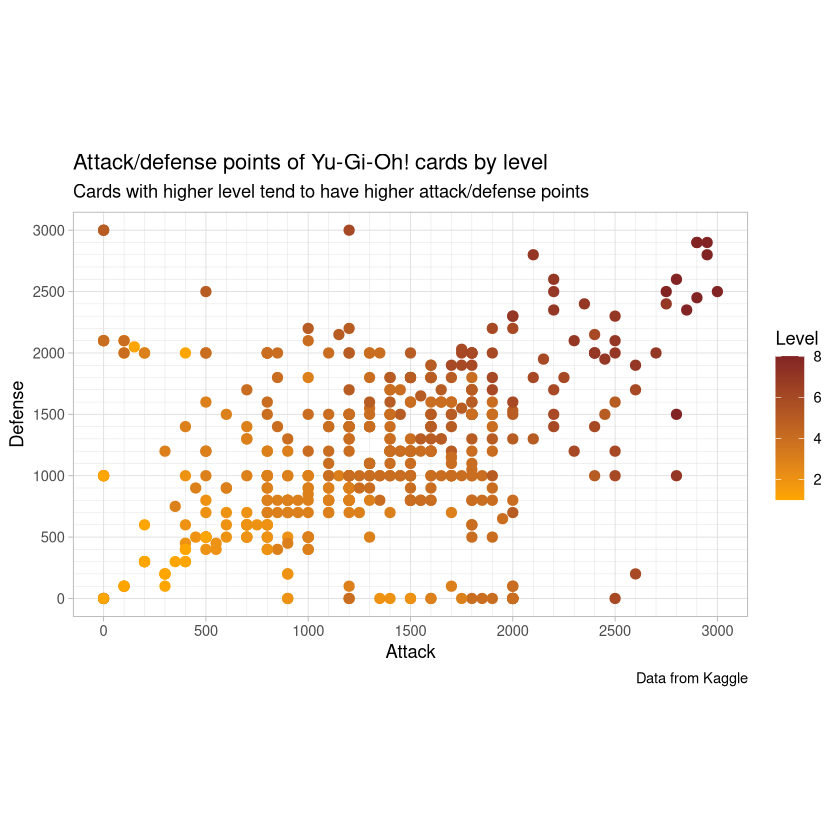

In [12]:
my_yugi_plot_themed <- function() {
    my_yugi_plot() +
      scale_color_gradient(
          low = "orange",
          high = muted("red")
      ) +
      theme_light() +
      theme(aspect = .6)
}
my_yugi_plot_themed()

**6. Add _annotations_ for selected data points and _circle_ them to make them stand out!** Here is a vector with three Yu-Gi-Oh! card names:

In [13]:
names <- c("Millennium Shield", "Baby Dragon", "Dark Magician")

Your task is to add _text annotations_ to the plot next to the data points that correspond to the card with the respective name. You should also add _larger circles_ around the data points so that it's easy to see which ones they are. Both of these techniques are described together in the book.

(_Note:_ You don't have to use the `ggrepel` library that is suggested in the book, but if you do, don't forget that you have to explicitly install & load the package first. On my system, I also had to install the `pillar` package first, because I would get error messages otherwise. If you run into similar/other issues, stick with the ggplot2 functions.)

In [14]:
(yugioh_selected <- filter(
    yugioh,
    Name %in% names
))

Name,Attributes,Sub-Types,Level,Attack_Points,Defense_Points
<chr>,<fct>,<fct>,<int>,<int>,<int>
Baby Dragon,Wind,Dragon,3,1200,700
Dark Magician,Dark,Spellcaster,7,2500,2100
Millennium Shield,Earth,Warrior,5,0,3000


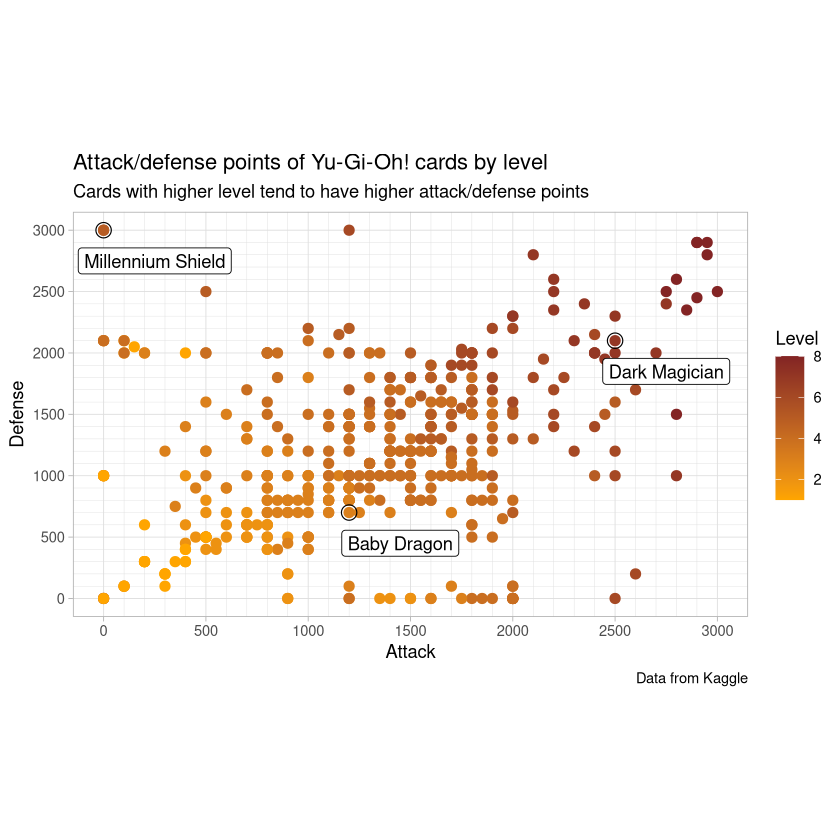

In [15]:
my_yugi_plot_themed() +
  geom_point(size = 4, shape = 1, data = yugioh_selected) +
  geom_label(
      aes(label = Name), 
      data = yugioh_selected,
      nudge_y = -250, nudge_x = 250)

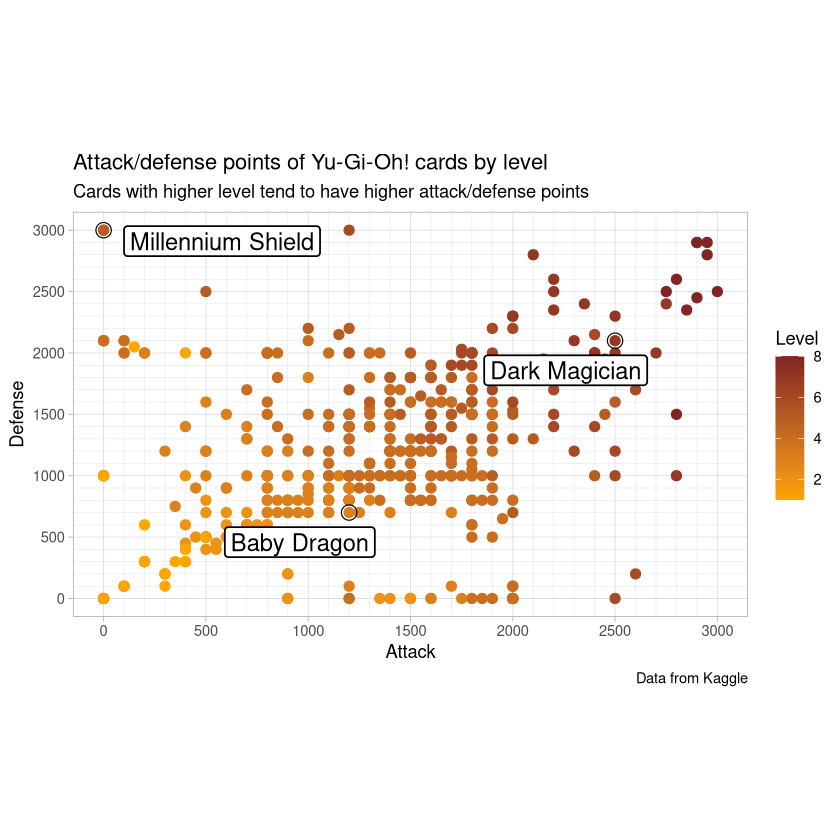

In [16]:
# ggrepel version:
library(ggrepel)

my_yugi_plot_themed() +
  geom_point(size = 4, shape = 1, data = yugioh_selected) +
  geom_label_repel(
      aes(label = Name),
      data = yugioh_selected,
      size = 5,
      label.size = .5,
      point.padding = 10,
  )

**7. Make the legend for "Level" appear with _discrete_ values instead of a gradient!** Currently, you should see the legend for the "Level" variable as a color gradient on the right-hand side of the plot. In our Seaborn plot, the individual levels (1 to 8) showed up as individual, discrete points. How can we achieve the same thing in ggplot2?

There are two ways you could approach this:

- Convert "Level" into a **factor**, so that it is a discrete-valued variable, then re-create the plot making sure to change the color scale functions to match.
- Modify the call to your `scale_color_*` function to change the way the legend is shown. Look in the help to figure out which parameters you need to change. (You probably have to change two.)

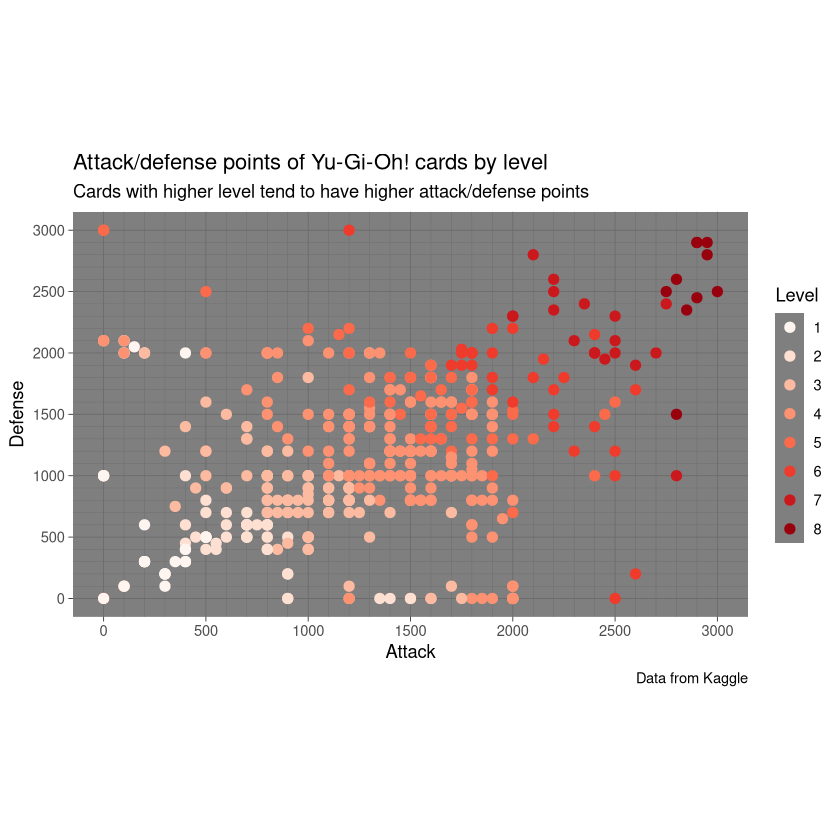

In [17]:
# Turn "Level" into a factor:
yugioh %>%
  mutate(Level = as.factor(Level)) %>%
  my_yugi_plot() +
    # have to use a *discrete* color scale now:
    scale_color_brewer(palette = "Reds") +
    theme_dark() +
    theme(aspect = .6)

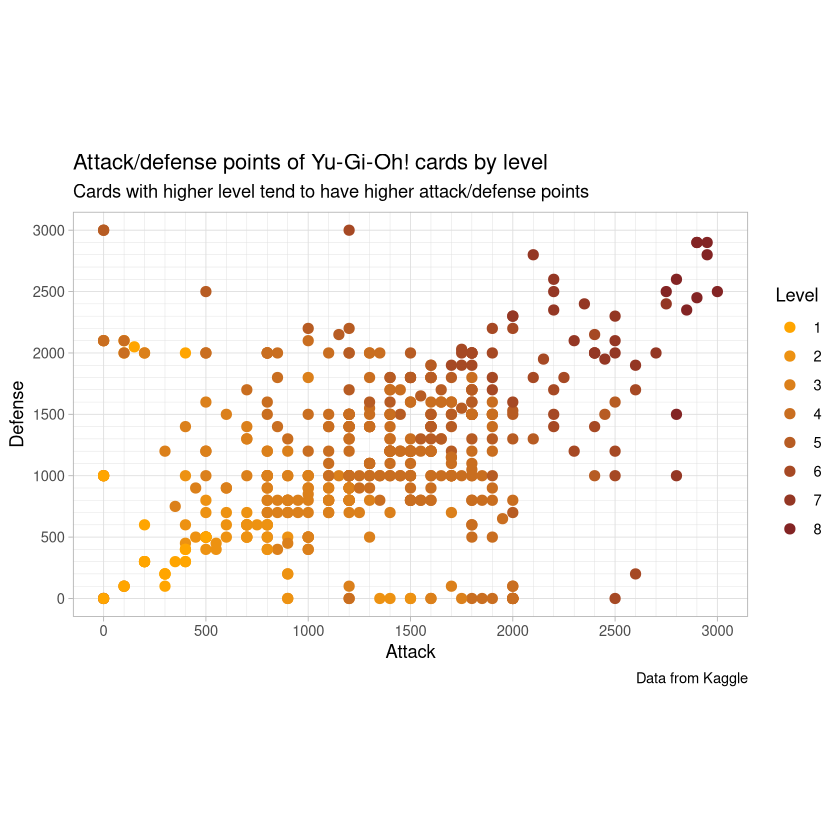

In [18]:
# Modifying scale_color_gradient call:
my_yugi_plot() +
  scale_color_gradient(
      low = "orange",
      high = muted("red"),
      guide = "legend",     # to make a discrete legend
      breaks = 1:8,         # to make ALL levels show up
  ) +
  theme_light() +
  theme(aspect = .6)

- - - 

## Recreating the Coffee Chain visualisation from Exercise 3

In Exercise 3, we created the following plot using Python and Seaborn:

<div style="padding:1em">
<img src="coffee-vis-ci.png" width="500"/>
</div>

In this exercise, we'll try to recreate a _similar_ plot with ggplot2, first **without** the confidence intervals (or "error bands"), then **with** the confidence intervals. You'll find that this requires a very different approach compared to Seaborn, as Seaborn performs a lot of steps (data aggregation, confidence interval estimation) automatically "behind the scenes". With ggplot, you will have to perform most of these steps explicitly yourself, so you'll need to combine what you learned about _data manipulation_ with what you learned about _plotting_.

**8. Create a plot showing the _average_ sales, profits, and expenses per day.** Your plot does _not_ have to look exactly like the Seaborn one, and it does _not need to have error bands/confidence intervals yet_, but it should otherwise convey the same information. That means:

- The date should be shown on the $x$-axis, and the quantity (of sales etc.) on the $y$-axis.
- The lines should show the _average_ of the respective quantity for the given date.
- The lines for the three quantities (sales, profits, expenses) should be distinguished by _color_ and _line style_.
- The $x$-axis should have a label on _at least_ every 3 months. (_Note:_ This requires another `scale_x_*` function you haven't used yet. You don't need to rotate the labels like in the Seaborn example, but you could do it with the `theme()` function.)
- The $y$-axis should go from $0$ to $400$ and have the same _ticks_ and _tick labels_, i.e., a major tick (with label) every 50 steps, and minor ticks every 10 steps.

I suggest to solve this in two steps: _first_ make a table with the exact, aggregated data you want to plot; _then_ make the plot. Such a table could, for example, look like this:

| Ddate      | Quantity     | Mean            |
|------------|--------------|-----------------|
| `<date>`   | `<fct>`      | `<dbl>`         |
| 2012-01-01 | Sales        | 164.90088       |
| 2012-01-01 | Profit       | 53.64425        |
| 2012-01-01 | Expenses     | 50.62124        |
| ...        | ...          | ...             |



In [19]:
# An elegant way to create this table is via pivoting:

coffee_agg <- coffee %>%
  group_by(Ddate) %>%
  summarize(
      Sales = mean(Sales),
      Profit = mean(Profit),
      Expenses = mean(Expenses),
  ) %>%
  pivot_longer(
      c(Sales, Profit, Expenses),
      names_to = "Quantity",
      names_transform = list(Quantity = as.factor),
      values_to = "Mean"
  )

head(coffee_agg)

Ddate,Quantity,Mean
<date>,<fct>,<dbl>
2012-01-01,Sales,164.90088
2012-01-01,Profit,53.64425
2012-01-01,Expenses,50.62124
2012-02-01,Sales,160.86900
2012-02-01,Profit,48.44192
2012-02-01,Expenses,48.33362


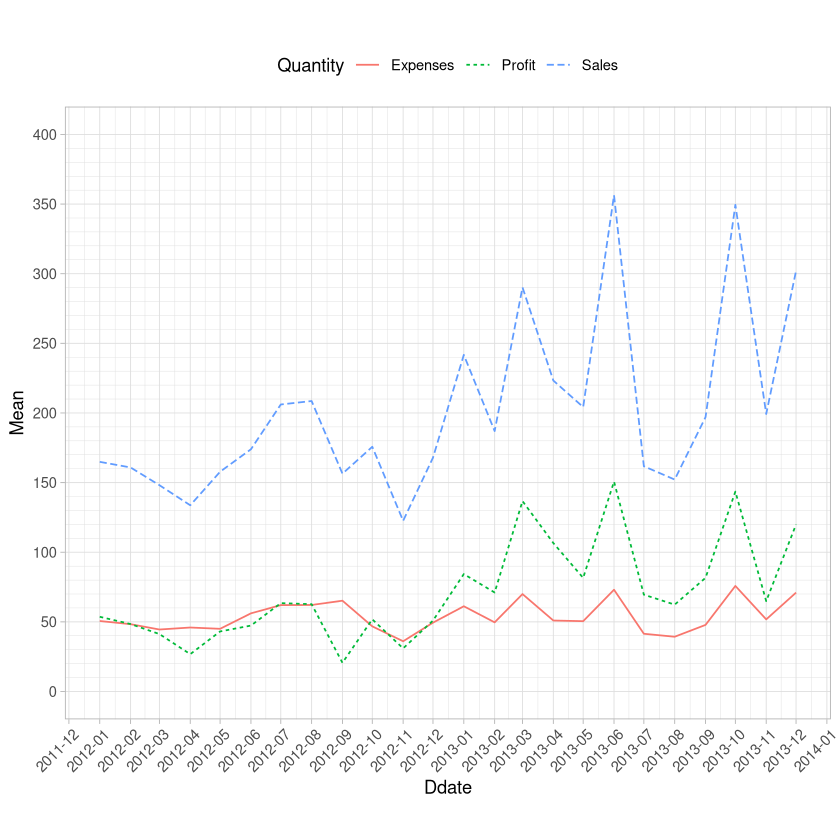

In [20]:
# Creating the plot:

ggplot(coffee_agg) +
    geom_line(aes(x = Ddate,
                  y = Mean,
                  color = Quantity,
                  linetype = Quantity)) +
    scale_y_continuous(
        limits = c(0, 400),
        breaks = seq(0, 400, by = 50),
        minor_breaks = seq(0, 400, by = 10),
    ) +
    scale_x_date(
        date_labels = "%Y-%m",
        date_breaks = "1 month"
    ) +
    theme_light() +
    theme(
        aspect = .8,
        legend.position = "top",
        axis.text.x = element_text(angle = 45, hjust = .9, vjust = .9)
    )

**9. Create the same plot _with confidence intervals_!** To find the right geom function for plotting the band, take a look at the [Data visualization cheatsheet](https://www.rstudio.com/resources/cheatsheets/). To compute the confidence intervals, you can use the following function:

In [21]:
computeCI <- function(data) {
    # Compute a 95% confidence interval, following: https://r-graphics.org/recipe-dataprep-summarize-se
    sd(data) / sqrt(length(data)) * qt(.975, length(data) - 1)
}

As an example, if the `mean()` for a given date and quantity is 100, and `computeCI()` is 5, then the interval that should be plotted is $[95, 105]$.

If you produced a **table** in Q8 like shown in the description, the best way to start would be by _adding a column_ for `computeCI()` to the table.

In [22]:
# Here is a way to produce the table in a single function chain.
# This is just one example of how this could be done, it is totally fine
# if you used multiple assignments to build your table step-by-step instead.

coffee_agg <- coffee %>%
  group_by(Ddate) %>%
  summarise(
      Sales_Mean = mean(Sales),
      Sales_CI = computeCI(Sales),
      Profit_Mean = mean(Profit),
      Profit_CI = computeCI(Profit),
      Expenses_Mean = mean(Expenses),
      Expenses_CI = computeCI(Expenses),
  ) %>%
  pivot_longer(
      -Ddate,
      names_to = c("Quantity", "Function"),
      names_transform = list(Quantity = as.factor),
      names_sep = "_",
      values_to = "Value"
  ) %>%
  pivot_wider(
      names_from = Function,
      values_from = Value
  )

head(coffee_agg)

Ddate,Quantity,Mean,CI
<date>,<fct>,<dbl>,<dbl>
2012-01-01,Sales,164.90088,6.421237
2012-01-01,Profit,53.64425,4.299846
2012-01-01,Expenses,50.62124,2.158041
2012-02-01,Sales,160.86900,4.453312
2012-02-01,Profit,48.44192,2.945079
2012-02-01,Expenses,48.33362,1.426208


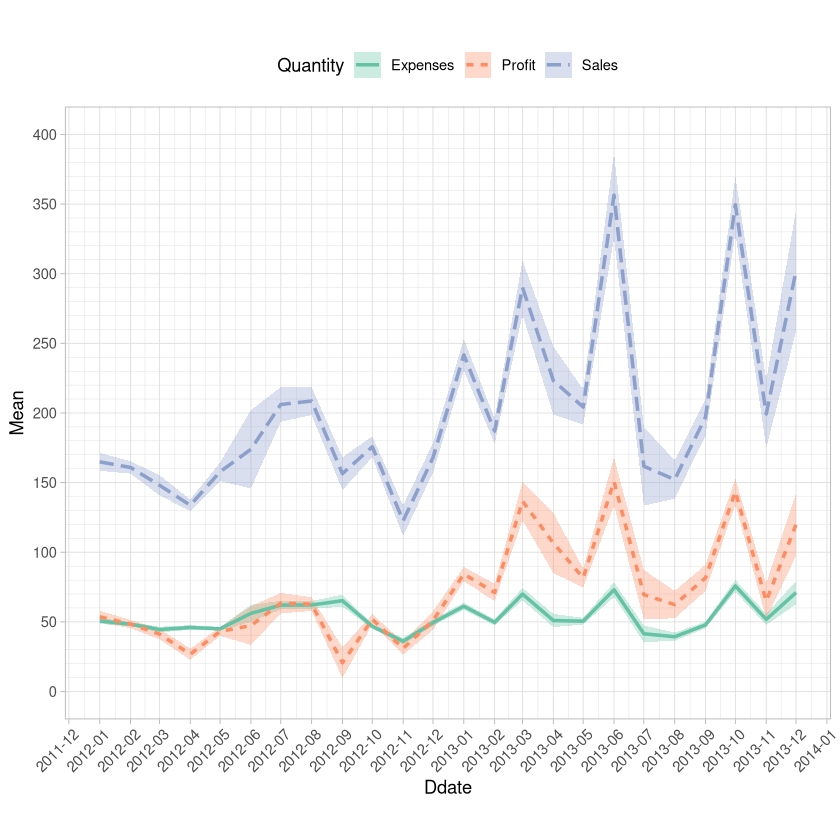

In [23]:
ggplot(coffee_agg, aes(x = Ddate)) +
    geom_ribbon(
        aes(ymin = Mean - CI,
            ymax = Mean + CI,
            fill = Quantity),
        alpha = .33) +
    geom_line(
        aes(y = Mean,
            linetype = Quantity,
            color = Quantity),
        size = 1) +
    scale_color_brewer(palette = "Set2") +
    scale_fill_brewer(palette = "Set2") +
    scale_y_continuous(
        limits = c(0, 400),
        breaks = seq(0, 400, by = 50),
        minor_breaks = seq(0, 400, by = 10),
    ) +
    scale_x_date(
        date_labels = "%Y-%m",
        date_breaks = "1 month"
    ) +
    theme_light() +
    theme(
        aspect = .8,
        legend.position = "top",
        axis.text.x = element_text(angle = 45, hjust = .9, vjust = .9)
    )